In [1]:
import pathlib
import os

import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

In [2]:
import pymysql

In [3]:
db = pymysql.connect(host='localhost',
                     user='root',
                     password='password',
                     database='chicago')
cursor = db.cursor()

In [4]:
sqlcom ="SELECT * FROM weekend_eveningPeak"
df= pd.read_sql(sqlcom, con=db)
print(df)

/opt/anaconda3/envs/python/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


            node_id         lat          lon            timestamp value_hrf
0      001e0610ee36   41.751295   -87.605288  2019/10/05 16:00:04     56.72
1      001e06113ad8   41.866786   -87.666306  2019/10/05 16:00:04     62.74
2      001e06113d20  41.8920031  -87.6116431  2019/10/05 16:00:05     56.72
3      001e0610bc10   41.736314   -87.624179  2019/10/05 16:00:06     95.61
4      001e0610ee43   41.788608   -87.598713  2019/10/05 16:00:06     56.72
...             ...         ...          ...                  ...       ...
39755  001e0610ba13   41.751238    -87.71299  2019/10/06 20:59:54     56.72
39756  001e06113d20  41.8920031  -87.6116431  2019/10/06 20:59:55     56.72
39757  001e0610ba15   41.722457    -87.57535  2019/10/06 20:59:57      55.0
39758  001e06113a24   41.788979   -87.597995  2019/10/06 20:59:57     56.72
39759  001e0610f732   41.895005   -87.745817  2019/10/06 20:59:59     56.72

[39760 rows x 5 columns]


In [5]:
# dateArr=[['2019/10/05 16','2019/10/05 18'],
#          ['2019/10/06 16','2019/10/06 18']]
# dataArr=[]
# for item in dateArr:
#     sqlcom ="SELECT sound_node.node_id,sound_node.lat,sound_node.lon,delsound.timestamp,delsound.value_hrf FROM delsound,sound_node WHERE delsound.node_id=sound_node.node_id and TIMESTAMP between '"+item[0]+"%' and '"+item[1]+"%'" 
#     print(sqlcom)
#     df= pd.read_sql(sqlcom, con=db)
#     print(df)


In [6]:
from decimal import Decimal
dict={}
for i in range(0,len(df)):
    key=df.iloc[i]['node_id']
    lat=df.iloc[i]['lat']
    lon=df.iloc[i]['lon']
    value=float(df.iloc[i]['value_hrf'])
    
    if key in dict:
        tempDict=dict.get(key)
        valueTemp=tempDict["value"]
        valueTemp.append(value)
        dict[key]=tempDict 
    else:
        dict[key]={"value":[value],"lon":lon,"lat":lat}

temp={}
for key in dict:
    tempDict=dict.get(key)
#     tempDict['average']=Decimal(np.mean(tempDict["value"])).quantize(Decimal('0.00'))
    tempDict['average']=np.mean(tempDict["value"])
    temp[key]=tempDict
print(temp)

{'001e0610ee36': {'value': [56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 62.74, 56.72, 56.72, 56

In [7]:
df=pd.DataFrame.from_dict(temp,orient='index')
df

,value,lon,lat,average
001e0610ee36,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55....",-87.605288,41.751295,58.121191
001e06113ad8,"[62.74, 55.0, 56.72, 56.72, 56.72, 56.72, 56.7...",-87.666306,41.866786,57.187058
001e06113d20,"[56.72, 55.0, 55.0, 56.72, 55.0, 56.72, 56.72,...",-87.6116431,41.8920031,56.926400
001e0610bc10,"[95.61, 95.61, 95.61, 95.71, 95.71, 95.61, 95....",-87.624179,41.736314,97.283270
001e0610ee43,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55....",-87.598713,41.788608,60.501252
001e06112e77,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.664343,41.786756,56.437351
001e061146cb,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55....",-87.683022,41.9140942,57.721081
001e0611462f,"[55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.7...",-87.641054,41.823527,57.128964
001e06113ace,"[62.74, 56.72, 55.0, 56.72, 55.0, 56.72, 56.72...",-87.617298,41.83107,57.265563
001e0610f703,"[62.74, 62.74, 62.74, 56.72, 56.72, 62.74, 62....",-87.67644,41.87148,59.199647


In [8]:
df.shape

(31, 4)

In [9]:
df['average']

001e0610ee36    58.121191
001e06113ad8    57.187058
001e06113d20    56.926400
001e0610bc10    97.283270
001e0610ee43    60.501252
001e06112e77    56.437351
001e061146cb    57.721081
001e0611462f    57.128964
001e06113ace    57.265563
001e0610f703    59.199647
001e06113acb    57.497969
001e061146ba    56.523272
001e0610ba13    56.387097
001e06113107    56.761831
001e061144cd    56.228571
001e06117b44    62.369480
001e061183f5    61.794522
001e0610ba46    60.705256
001e0610f6db    56.628797
001e061130f4    56.911453
001e06113a24    56.544091
001e0610ba15    56.657576
001e0610f732    61.667910
001e0610e538    57.913010
001e0611441e    58.042246
001e06118295    60.692972
001e061144be    56.498220
001e0610bbe5    56.871222
001e0610f05c    62.162930
001e0611850f    62.493783
001e061184a3    61.564742
Name: average, dtype: float64

In [10]:
df['lat'].astype(float)

001e0610ee36    41.751295
001e06113ad8    41.866786
001e06113d20    41.892003
001e0610bc10    41.736314
001e0610ee43    41.788608
001e06112e77    41.786756
001e061146cb    41.914094
001e0611462f    41.823527
001e06113ace    41.831070
001e0610f703    41.871480
001e06113acb    41.839066
001e061146ba    41.967590
001e0610ba13    41.751238
001e06113107    41.751142
001e061144cd    41.874200
001e06117b44    41.721301
001e061183f5    41.692703
001e0610ba46    41.878377
001e0610f6db    41.791329
001e061130f4    41.896157
001e06113a24    41.788979
001e0610ba15    41.722457
001e0610f732    41.895005
001e0610e538    41.736593
001e0611441e    41.808594
001e06118295    41.820972
001e061144be    41.792543
001e0610bbe5    41.736495
001e0610f05c    41.924903
001e0611850f    41.692837
001e061184a3    41.714021
Name: lat, dtype: float64

In [11]:
Chicago_Streets_Shapefiles = '.../street-chicago.shp'
Chicago_Boundary_Shapefile = '.../il-chicago.shp'

97.28327004219409


Text(0.5, 1.0, 'Sound level at evening peak in Chicago on weekend')

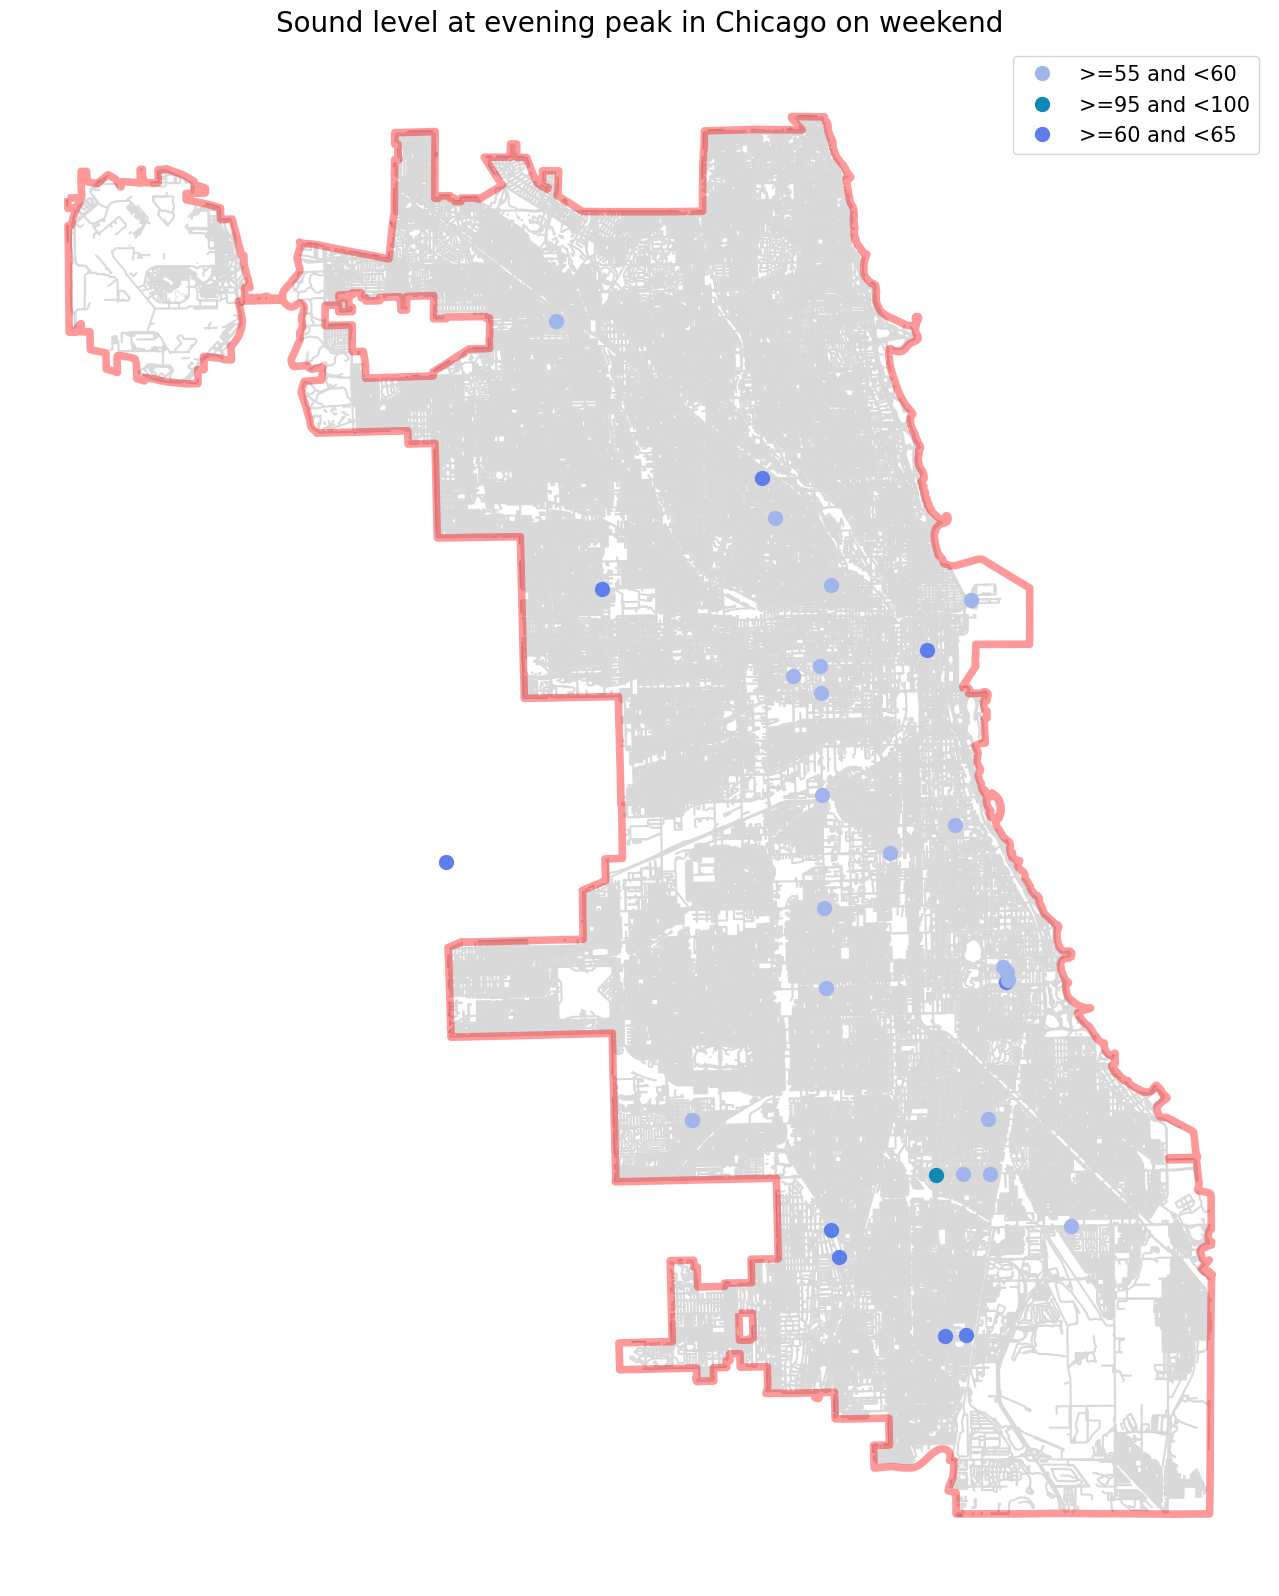

In [12]:
plt.style.use('default')

# Read street information
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)
f, ax = plt.subplots(1, figsize=(20, 20))
# Draw the streets of Chicago
streetmap.plot(ax=ax, color='silver', zorder = 0)

# Read boundary information
boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Draw the boundaries of Chicago

boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

colorDict={}

for i in range(0, len(df)):
    if df.iloc[i]['average']<50:
        color="#a3a6fa"
        label='<50'
    elif df.iloc[i]['average']>=50 and df.iloc[i]['average']<55:
        color="#FFA0D0"
        label='>=50 and <55'
    elif df.iloc[i]['average']>=55 and df.iloc[i]['average']<60:
        color="#a1b5ed"
        label='>=55 and <60'
    elif df.iloc[i]['average']>=60 and df.iloc[i]['average']<65:
        color="#5e7feb"
        label='>=60 and <65'
    elif df.iloc[i]['average']>=65 and df.iloc[i]['average']<70:
        color="#f4ff75"
        label='>=65 and <70'
    elif df.iloc[i]['average']>=70 and df.iloc[i]['average']<75:
        color = "#ffa43b"
        label='>=70 and <75'
    elif df.iloc[i]['average']>=75 and df.iloc[i]['average']<80:
        color="#B20059"
        label='>=75 and <80'
    elif df.iloc[i]['average']>=80 and df.iloc[i]['average']<85:
        color = "#155c09"
        label='>=80 and <85'
    elif df.iloc[i]['average']>=85 and df.iloc[i]['average']<90:
        color="#ae00ff"
        label='>=85 and <90'
    elif df.iloc[i]['average']>=90 and df.iloc[i]['average']<95:
        color="#db0d0d"
        label='>=90 and <95'
    else:
        print(df.iloc[i]['average'])
        color="#0d89b3"
        label='>=95 and <100'
    if  color in colorDict:
        label=""
    else:
        colorDict[color]=label

    ax.plot(float(df.iloc[i]['lon']),float(df.iloc[i]['lat']), marker='o', label=label, color=color,linestyle='', ms=10, zorder = 10)
#     print(df.iloc[i]['average'],float(df.iloc[i]['lon']),float(df.iloc[i]['lat']))
    
# ax.legend(),set legend
ax.legend()
plt.legend(loc=1,fontsize = 15)

title='Sound level at evening peak in Chicago on weekend'

# Turn off the X and Y axes
ax.set_axis_off()
ax.set_title(title, fontsize = 20, fontdict = {'verticalalignment':'bottom'})
